## Singular Value Decomposition (SVD)

SVD is a matrix factorization technique that decomposes a matrix into three matrices to reveal its structure, rank, and key features. It is widely used in dimensionality reduction, data compression, and noise reduction.

### Why Use SVD?
- Reduces the dimensionality of data while retaining key information.
- Compresses images and data efficiently.
- Removes noise by ignoring insignificant components.

### How SVD Works:
1. **Decompose the Matrix**: Any matrix \( A \) is factored as:
   $$
   A = U \Sigma V^T
   $$
   - \( U \): Orthogonal matrix of left singular vectors.
   - \( Sigma \): Diagonal matrix with singular values.
   - \( V \): Orthogonal matrix of right singular vectors.

2. **Rank-\( k \) Approximation**:  
   Retain only the top \( k \) singular values and corresponding singular vectors to approximate \( A \):
   $$
   A_k = U_k \Sigma_k V_k^T
   $$

3. **Reconstruct the Data**: Multiply the truncated matrices to reconstruct the lower-rank approximation.

---

## Low-Rank Approximation with SVD

Low-rank approximation uses only the largest singular values to approximate a matrix, reducing storage size and computation while preserving key patterns.

### Steps for Low-Rank Approximation:
1. Perform SVD on the original matrix \( A \).
2. Select the top \( k \) singular values from \( \Sigma \).
3. Truncate \( U \) and \( V^T \) to match the reduced rank \( k \).
4. Reconstruct \( A \) using:
   $$
   A_k = U_k \Sigma_k V_k^T
   $$

### Applications:
- **Image Compression**: Reduces image storage size while maintaining visual quality.
- **Dimensionality Reduction**: Simplifies data for faster computation.
- **Noise Reduction**: Removes less significant components (smaller singular values).

---

## Applications of SVD

### Image Compression
SVD approximates an image matrix using fewer singular values, reducing the size of the image without significant loss of quality.

**Steps**:
1. Perform SVD on the image matrix.
2. Retain the top \( k \) singular values.
3. Reconstruct the image with the reduced matrices.

### Noise Reduction
Small singular values often correspond to noise. By truncating these values, SVD can denoise data while preserving meaningful information.

### Dimensionality Reduction
Similar to PCA, SVD reduces the number of dimensions in data by approximating it using the largest singular values.

## Code Application
Task: Apply SVD to reduce pokemon image. 

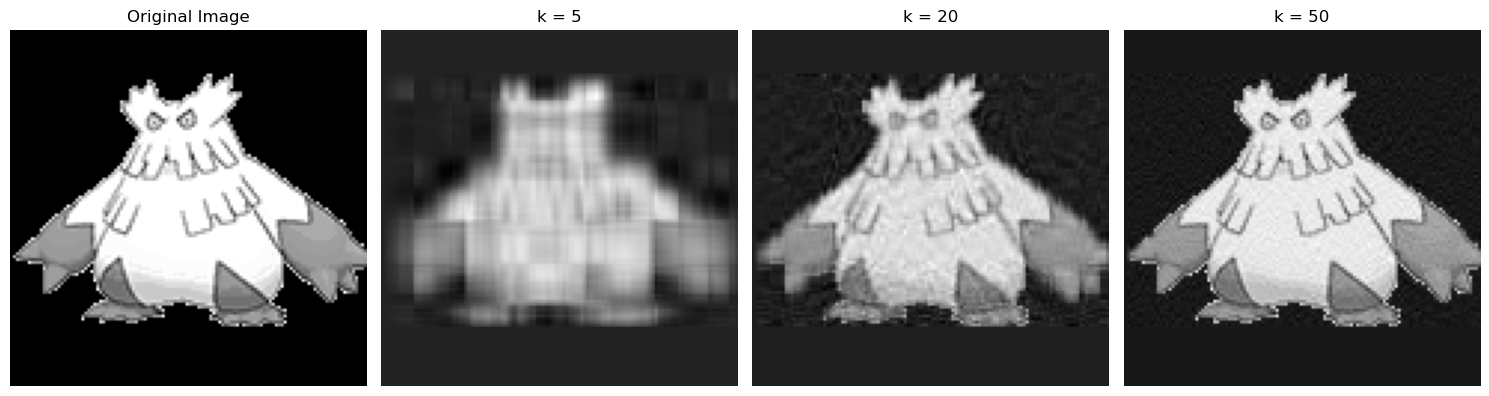

In [4]:
# Simplified version: Remove if-else and directly process the image
image_path = '/Users/sherrymao/Documents/Git/INDE577-TianyiMao/Data/Pokemon_data/images/abomasnow.png'

# Read the image
image = io.imread(image_path)
image_rgb = image[:, :, :3]  # Always take the first 3 channels (handles RGB/RGBA)

# Convert to grayscale
gray_image = color.rgb2gray(image_rgb)

# Perform SVD
U, S, Vt = np.linalg.svd(gray_image, full_matrices=False)

# Compression function
def compress_image(U, S, Vt, k):
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    return np.dot(U_k, np.dot(S_k, Vt_k))

# Plot original and compressed images
k_values = [5, 20, 50]
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, len(k_values) + 1, 1)
plt.imshow(gray_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Compressed images
for i, k in enumerate(k_values, start=2):
    compressed_image = compress_image(U, S, Vt, k)
    plt.subplot(1, len(k_values) + 1, i)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()
